<a href="https://colab.research.google.com/github/MrDarkTesla/QCL_2021/blob/main/QCL_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install qiskit

In [ ]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

# Scipy
from scipy.optimize import rosen, differential_evolution

# Files
from google.colab import files

In [ ]:
# IBMQ.save_account()

In [ ]:
#N = 4
#depth = 5
N = 2
depth = 2
Iterations = 1000 

In [ ]:
X = np.random.rand(150, 2)

#def f(x):
#  if x[0] >= 0.5:
#    return 1
#  return 0

def f(x):
  if (x[0] - .5 ) ** 2 + (x[1] - .5) ** 2 >= 0.35 ** 2:
    return 1
  return 0


def active(x):
  #x /= 6
  #r = 1 / (1 + np.e ** (-x))
  #return (r + 1) / 2 
  return x




In [ ]:
def U_in(x, xq, qc):
  phi = np.pi / 8 + x[0] * 7 * np.pi / 4 
  omega = np.pi / 8 + x[1] * np.pi * 3 / 4
  qc.rx(omega, xq)
  qc.rz(phi, xq)



def U_out(i, j, xq, qc, theta, n):
  t = (i + j * n) * 3
  qc.rx(theta[t + 0], xq[i])
  qc.rz(theta[t + 1], xq[i])
  qc.rx(theta[t + 2], xq[i])


def Hamelton(n, qc):
  for i in range(n - 1):
    qc.cx(i, i + 1)
  if n != 2:
    qc.cx(0, -1)
#  qc.cx(1, 0)
#  qc.cx(1, 2)
#  qc.cx(1, 3)
#  qc.cx(3, 4)
#  qc.cx(0, 1)
#  qc.cx(2, 1)
#  qc.cx(4, 3)
#  qc.cx(3, 1)


In [ ]:
def fi(xi, N, depth, theta, Iterations):

  xq = QuantumRegister(N, "x")
  yc = ClassicalRegister(1, "y") # N instead
  qc = QuantumCircuit(xq, yc)

  U_in(xi, xq, qc) 
  for j in range(depth):
    Hamelton(N, qc)
    for k in range(N):
      U_out(k, j, xq, qc, theta, N)

  qc.measure(xq[0], yc)
  job = execute(qc, backend, shots=Iterations)
  result = job.result()
  count = result.get_counts()
  res = sum([float(k)*count[k] for k in count]) / Iterations # activ funk here
  return active(res)

In [ ]:
def Lfunk(Theta):
  s = np.pi /2
  L = 0 
  for t in X: # was TEACHER
    val = fi(t, N, depth, theta, Iterations)
    plt.plot(t[0], t[1], marker = "*", color = [val, 0, 1 - val])
    L += (f(t) - val) ** 2
  plt.show()
  return L


def GradLfunk(theta):
  gr = [0] * len(theta)
  s = np.pi /2 
  for t in X: # was TEACHER
    for i in range(len(theta)):
      theta[i] += s
      A = fi(t, N, depth, theta, Iterations)
      theta[i] -= 2 * s
      B = fi(t, N, depth, theta, Iterations)
      theta[i] += s
      C = (A - B)
      gr[i] += (fi(t, N, depth, theta, Iterations) - f(t)) * C / np.sin(s)
  return np.array(gr)


In [ ]:
def ftestgrad(x):
  return np.array([2 * (x[0] - 1), 2 * (x[1] + 1)])


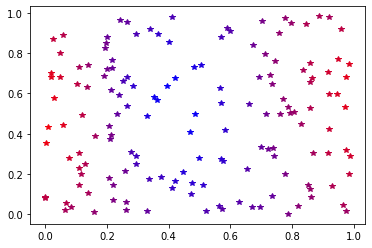

1  )  27.349521000000003


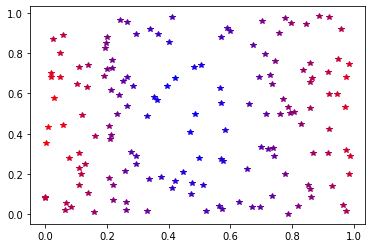

2  )  26.912338999999996


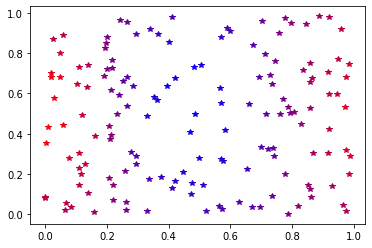

3  )  26.683263


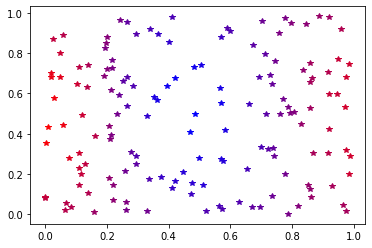

4  )  26.514240000000008


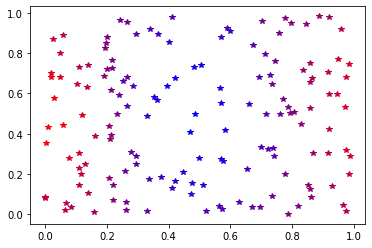

5  )  26.66200799999999


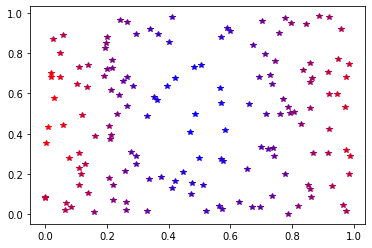

6  )  26.811844999999987


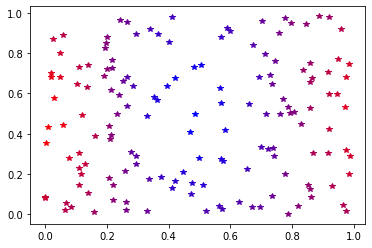

7  )  26.63617499999999


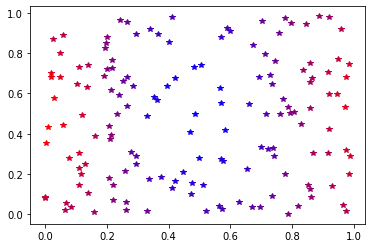

8  )  26.41540400000001


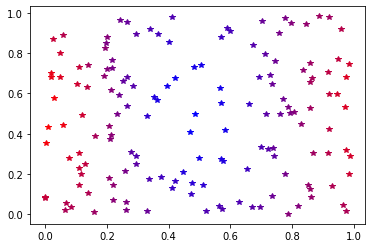

9  )  26.52304399999999


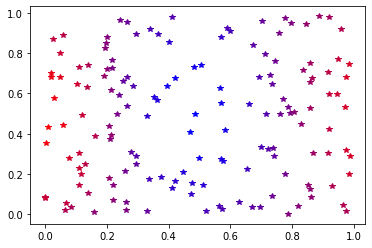

10  )  26.681551999999982


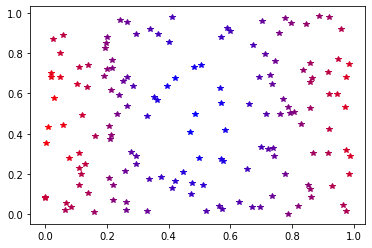

11  )  26.610316000000008


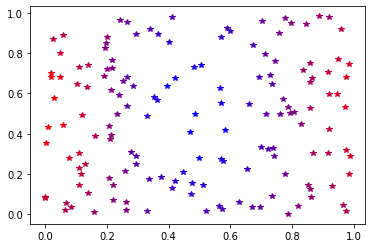

12  )  26.47865400000001


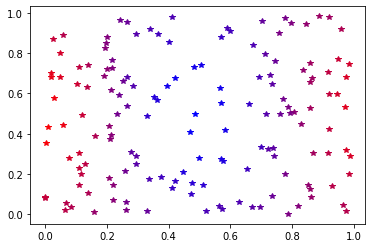

13  )  26.740582999999987


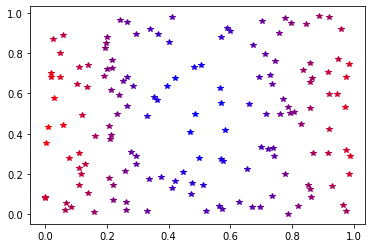

14  )  26.290225999999986


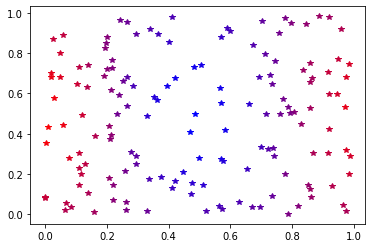

15  )  26.43667


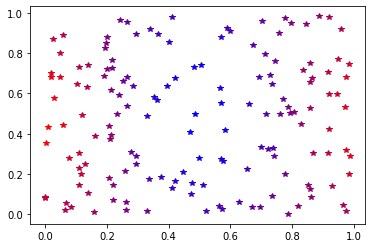

16  )  26.826408999999988


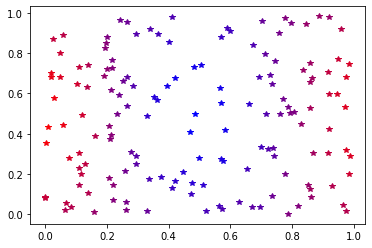

17  )  26.378110000000014


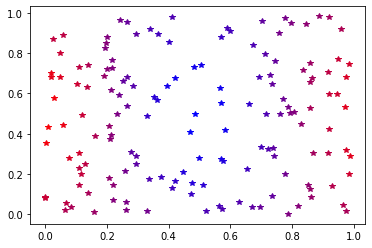

18  )  26.581939000000002


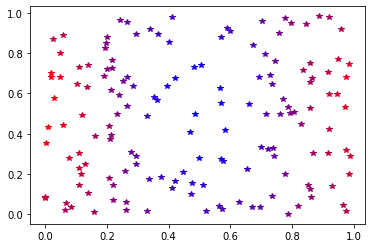

19  )  26.550157999999996


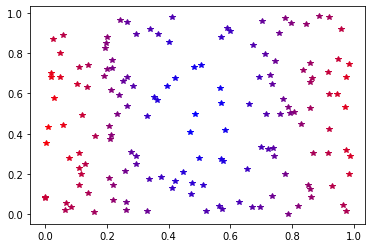

20  )  26.46365300000001
[ 0.1969543  -0.09761873 -0.03192305  0.91971489  0.12668088  0.85648675
  1.16574533  0.11066594  0.41427721  0.84833692  0.63008833  0.54896705]
20


In [ ]:
M = 20
backend = Aer.get_backend('qasm_simulator')
np.random.seed()
theta = np.random.rand(3 * N * depth)
bounds = [(0,2 * np.pi)] * len(theta)

L = [.0] * M

etta = .02
for i in range(M):
  theta -= etta * GradLfunk(theta)
  L[i] = Lfunk(theta)
  print(i + 1, " ) ", L[i])
print(theta)
print(M)

[ 0.1969543  -0.09761873 -0.03192305  0.91971489  0.12668088  0.85648675
  1.16574533  0.11066594  0.41427721  0.84833692  0.63008833  0.54896705]


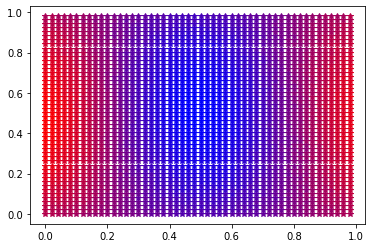

In [ ]:
S = 50
print(theta)
for i in range(0, S):
  for j in range(0, S):
    t = [float(i) / 50, float(j) / 50]
    val = fi(t, N, depth, theta, Iterations)
    plt.plot(t[0],t[1],marker = "*", color = [val, 0, 1 - val])
plt.show()


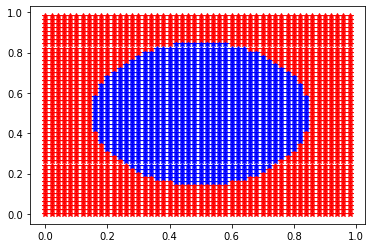

In [ ]:
for i in range(0, S):
  for j in range(0, S):
    t = [float(i) / 50, float(j) / 50]
    val = f(t)
    plt.plot(t[0],t[1],marker = "*", color = [val, 0, 1 - val])
plt.show()

In [ ]:
#backend = Aer.get_backend('qasm_simulator')
#result = differential_evolution(Lfunk, bounds)
#np.save("Result.npy", result)
#files.download('Test.npy')

In [ ]:
# 1.1
# Limited angles 
# 2 * 2
#[0.52087337 0.84937232 0.03119411 0.9237847  0.02856473 0.32867104
# 0.40199847 0.82932378 1.10111742 0.13315497 0.49829797 0.12719523]

In [ ]:
# 1.2
# No limited angles 
# 2 * 2
#[0.25972326 0.07162579 0.30073029 0.73434707 0.11781603 0.07917245
# 0.25784423 1.39247086 1.50083065 0.17208365 0.98122012 0.23253401]

In [ ]:
#2.1
# Limited angles 
# 3 * 5
#[ 0.69149945  0.54095979  0.69189643  0.82428907  1.34947342  0.33434568
#  0.35891099  0.60265138  0.03860823  0.28447319  0.3450091   0.46674013
#  0.89836483 -0.30191252  0.38916333  0.3956384   0.23654153  0.72379114
# -0.08086988  1.68446301 -0.05643865  0.3387043   0.49007774  0.41167871
#  0.36314313  0.50180672 -0.05122247  0.83138627 -0.07138288  0.94627671
#  0.63298583  0.22200609  1.04810217  0.24858524  1.03790205  0.52697893
#  0.5045325   0.38373848  0.75397767 -0.00677713  0.90327879  0.46015985
#  0.96627483  0.05080612  0.18637516  0.72711926  0.38099571  0.08139937
# 0.00601941  0.71070439 -0.47993177  0.16388796  0.15380792  0.69086967
#  0.0416886   0.83748886  0.16190174  0.44470629  0.39598633  0.95872365]

In [ ]:
#2.2
# No limited angles 
# 2 * 2
#[ 0.50722731  0.23181427  0.72631962  0.10844629  0.82791173  0.47655013
#  0.68216046 -0.59353574  0.68221686  0.79093442  0.53944074  0.25172407]

In [ ]:
#2.3
#Limited angles 
# 2 * 2
#[ 0.1969543  -0.09761873 -0.03192305  0.91971489  0.12668088  0.85648675
#  1.16574533  0.11066594  0.41427721  0.84833692  0.63008833  0.54896705]